In [6]:
import numpy
import chainer
from chainer.variable import Variable
import matplotlib.pyplot as plt
import pathlib
from generator import Generator
from chainer.serializers import load_npz
from utils import plot_kde_data, plot_scatter_data

In [8]:
data_size=10000
seed=0
epochs = [1, 10, 30, 100, 200]

In [11]:
axes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11262dda0>,
      dtype=object)

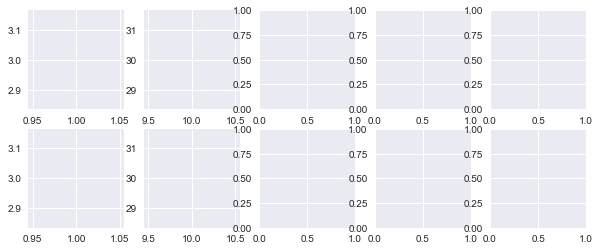

In [15]:
fig, axes = plt.subplots(2, len(epochs), figsize=(10, 4))
for i in axes:
    i[0].plot(1, 3)
    i[1].plot(10, 30)

In [2]:
for i in [1, 2, 3,5]:
    fig, axes = plt.subplots(2, len(epochs))
    for epoch, ax in zip(epochs, axes):
        path = pathlib.Path("result_{0}/gen_epoch_{1}.npz".format(i, epochs))
        gen = Generator(isBN=False)
        load_npz(path, gen)
        np.random.seed(seed)
        z = gen.make_hidden(batchsize=data_size)
        with chainer.using_config('train', False):                                                                               
            with chainer.using_config('enable_backprop', False):
                z = Variable(gen.make_hidden(batchsize=data_size))
                x = gen(z)

        plot_kde_data(x, epoch, "result_{0}_epoch_{1}.jpg".format(i, epochs))

AttributeError: 'Generator' object has no attribute 'makehidden'

TypeError: unsupported operand type(s) for +: 'PosixPath' and 'str'